# 2022 빅콘테스트_spec+loan
## 우 걱정마세요

##1. 라이브러리 및 패키지 불러오기

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
join = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/join(respec+loan).csv')

,Unnamed: 0,application_id,user_id,gender,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,...,existing_loan_cnt,existing_loan_amt,reage,career,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,0,1748340,430982.0,1.0,2022-06-07 13:05:39,620.0,24000000.0,3.0,정규직,자가,...,2.0,15000000.0,20.0,1.0,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1,1748340,430982.0,1.0,2022-06-07 13:05:39,620.0,24000000.0,3.0,정규직,자가,...,2.0,15000000.0,20.0,1.0,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,2,1748340,430982.0,1.0,2022-06-07 13:05:39,620.0,24000000.0,3.0,정규직,자가,...,2.0,15000000.0,20.0,1.0,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,3,1748340,430982.0,1.0,2022-06-07 13:05:39,620.0,24000000.0,3.0,정규직,자가,...,2.0,15000000.0,20.0,1.0,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,4,1748340,430982.0,1.0,2022-06-07 13:05:39,620.0,24000000.0,3.0,정규직,자가,...,2.0,15000000.0,20.0,1.0,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN


In [ ]:
join = join.drop(['insert_time'], axis = 1)

In [ ]:
sample = join[join['user_id'].isnull()]
sample['is_applied'].value_counts()

1.0    113
Name: is_applied, dtype: int64

# 2. 군집화

In [ ]:
join_c = join[['bank_id','product_id']]
join_c.head()

,bank_id,product_id
0,7,191
1,25,169
2,2,7
3,4,268
4,11,118


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.decomposition import PCA

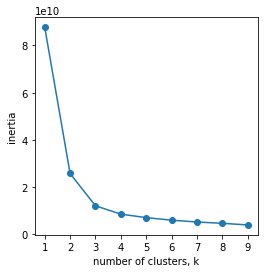

In [ ]:
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(join_c)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
# K-Means 모델과 군집 예측값을 생성

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 4 # 클러스터 갯수
#                      , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
#                      , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
#                      , random_state = 42
#                      , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(join_c) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(join_c) # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

           0           1
0  28.720294   40.532088
1  32.399915  184.171850
2  32.842357  125.579710
3  36.465783  242.196500
[1 1 0 3 2 1 0 3 1 1]


In [ ]:
# 원래 데이터에 예측된 군집 붙이기
clust_df = join_c.copy()
clust_df['clust'] = pred
clust_df.head()

,bank_id,product_id,clust
0,7,191,1
1,25,169,1
2,2,7,0
3,4,268,3
4,11,118,2


# 3. 전처리

## 1) gender

In [ ]:
join['clust'] = clust_df['clust']

In [ ]:
join.loc[(join['clust']==0) & (join['is_applied']==1) & (join['gender'].isnull()), 'gender'] =  join[(join['clust'] == 0) & (join['is_applied'] == 1)]['gender'].max()
join.loc[(join['clust']==1) & (join['gender'].isnull()), 'gender'] = join[(join['clust'] == 1) & (join['is_applied'] == 1)]['gender'].max()
join.loc[(join['clust']==2) & (join['gender'].isnull()), 'gender'] = join[(join['clust'] == 2) & (join['is_applied'] == 1)]['gender'].max()
join.loc[(join['clust']==3) & (join['gender'].isnull()), 'gender'] = join[(join['clust'] == 3) & (join['is_applied'] == 1)]['gender'].max()

##2) credit_score

In [ ]:
join.loc[(join['clust']==0) & (join['credit_score'].isnull()) & (join['is_applied']==1), 'credit_score'] = join[join['clust'] == 0]['credit_score'].mean()
join.loc[(join['clust']==1) & (join['credit_score'].isnull()) & (join['is_applied']==1), 'credit_score'] = join[join['clust'] == 1]['credit_score'].mean()
join.loc[(join['clust']==2) & (join['credit_score'].isnull()) & (join['is_applied']==1), 'credit_score'] = join[join['clust'] == 2]['credit_score'].mean()
join.loc[(join['clust']==3) & (join['credit_score'].isnull()) & (join['is_applied']==1), 'credit_score'] = join[join['clust'] == 3]['credit_score'].mean()

##3) yearly_income 

In [ ]:
join.loc[(join['clust']==0) & (join['yearly_income'].isnull()) & (join['is_applied']==1), 'yearly_income'] = join[join['clust'] == 0]['yearly_income'].mean()
join.loc[(join['clust']==1) & (join['yearly_income'].isnull()) & (join['is_applied']==1), 'yearly_income'] = join[join['clust'] == 1]['yearly_income'].mean()
join.loc[(join['clust']==2) & (join['yearly_income'].isnull()) & (join['is_applied']==1), 'yearly_income'] = join[join['clust'] == 2]['yearly_income'].mean()
join.loc[(join['clust']==3) & (join['yearly_income'].isnull()) & (join['is_applied']==1), 'yearly_income'] = join[join['clust'] == 3]['yearly_income'].mean()

##4) income_type  

In [ ]:
join.loc[(join['clust']==0) & (join['income_type'].isnull()) & (join['is_applied']==1), 'income_type'] = join[join['clust'] == 0]['income_type'].mean()
join.loc[(join['clust']==1) & (join['income_type'].isnull()) & (join['is_applied']==1), 'income_type'] = join[join['clust'] == 1]['income_type'].mean()
join.loc[(join['clust']==2) & (join['income_type'].isnull()) & (join['is_applied']==1), 'income_type'] = join[join['clust'] == 2]['income_type'].mean()
join.loc[(join['clust']==3) & (join['income_type'].isnull()) & (join['is_applied']==1), 'income_type'] = join[join['clust'] == 3]['income_type'].mean()

##5) employment_type

In [ ]:
items= join['employment_type']
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
join['employment_type'] = labels

In [ ]:
join.loc[(join['clust']==0) & (join['employment_type'].isnull()) & (join['is_applied']==1), 'employment_type'] = join[join['clust'] == 0]['employment_type'].max()
join.loc[(join['clust']==1) & (join['employment_type'].isnull()) & (join['is_applied']==1), 'employment_type'] = join[join['clust'] == 1]['employment_type'].max()
join.loc[(join['clust']==2) & (join['employment_type'].isnull()) & (join['is_applied']==1), 'employment_type'] = join[join['clust'] == 2]['employment_type'].max()
join.loc[(join['clust']==3) & (join['employment_type'].isnull()) & (join['is_applied']==1), 'employment_type'] = join[join['clust'] == 3]['employment_type'].max()

##6) houseown_type

In [ ]:
items= join['houseown_type']
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
join['houseown_type'] = labels

In [ ]:
join.loc[(join['clust']==0) & (join['houseown_type'].isnull()) & (join['is_applied']==1), 'houseown_type'] = join[join['clust'] == 0]['houseown_type'].max()
join.loc[(join['clust']==1) & (join['houseown_type'].isnull()) & (join['is_applied']==1), 'houseown_type'] = join[join['clust'] == 1]['houseown_type'].max()
join.loc[(join['clust']==2) & (join['houseown_type'].isnull()) & (join['is_applied']==1), 'houseown_type'] = join[join['clust'] == 2]['houseown_type'].max()
join.loc[(join['clust']==3) & (join['houseown_type'].isnull()) & (join['is_applied']==1), 'houseown_type'] = join[join['clust'] == 3]['houseown_type'].max()

##7) desired_amount

In [ ]:
join.loc[(join['clust']==0) & (join['desired_amount'].isnull()) & (join['is_applied']==1), 'desired_amount'] = join[join['clust'] == 0]['desired_amount'].mean()
join.loc[(join['clust']==1) & (join['desired_amount'].isnull()) & (join['is_applied']==1), 'desired_amount'] = join[join['clust'] == 1]['desired_amount'].mean()
join.loc[(join['clust']==2) & (join['desired_amount'].isnull()) & (join['is_applied']==1), 'desired_amount'] = join[join['clust'] == 2]['desired_amount'].mean()
join.loc[(join['clust']==3) & (join['desired_amount'].isnull()) & (join['is_applied']==1), 'desired_amount'] = join[join['clust'] == 3]['desired_amount'].mean()

##8) personal_rehabilitation_yn

In [ ]:
join.loc[(join['clust']==0) & (join['personal_rehabilitation_yn'].isnull()) & (join['is_applied']==1), 'personal_rehabilitation_yn'] = join[join['clust'] == 0]['personal_rehabilitation_yn'].max()
join.loc[(join['clust']==1) & (join['personal_rehabilitation_yn'].isnull()) & (join['is_applied']==1), 'personal_rehabilitation_yn'] = join[join['clust'] == 1]['personal_rehabilitation_yn'].max()
join.loc[(join['clust']==2) & (join['personal_rehabilitation_yn'].isnull()) & (join['is_applied']==1), 'personal_rehabilitation_yn'] = join[join['clust'] == 2]['personal_rehabilitation_yn'].max()
join.loc[(join['clust']==3) & (join['personal_rehabilitation_yn'].isnull()) & (join['is_applied']==1), 'personal_rehabilitation_yn'] = join[join['clust'] == 3]['personal_rehabilitation_yn'].max()

##9) purpose

In [ ]:
items= join['purpose']
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
join['purpose'] = labels

In [ ]:
join.loc[(join['clust']==0) & (join['purpose'].isnull()) & (join['is_applied']==1), 'purpose'] = join[join['clust'] == 0]['purpose'].max()
join.loc[(join['clust']==1) & (join['purpose'].isnull()) & (join['is_applied']==1), 'purpose'] = join[join['clust'] == 1]['purpose'].max()
join.loc[(join['clust']==2) & (join['purpose'].isnull()) & (join['is_applied']==1), 'purpose'] = join[join['clust'] == 2]['purpose'].max()
join.loc[(join['clust']==3) & (join['purpose'].isnull()) & (join['is_applied']==1), 'purpose'] = join[join['clust'] == 3]['purpose'].max()

##10) personal_rehabilitation_complete_yn

In [ ]:
join.loc[(join['clust']==0) & (join['personal_rehabilitation_complete_yn'].isnull()) & (join['is_applied']==1), 'personal_rehabilitation_complete_yn'] = join[join['clust'] == 0]['personal_rehabilitation_complete_yn'].max()
join.loc[(join['clust']==1) & (join['personal_rehabilitation_complete_yn'].isnull()) & (join['is_applied']==1), 'personal_rehabilitation_complete_yn'] = join[join['clust'] == 1]['personal_rehabilitation_complete_yn'].max()
join.loc[(join['clust']==2) & (join['personal_rehabilitation_complete_yn'].isnull()) & (join['is_applied']==1), 'personal_rehabilitation_complete_yn'] = join[join['clust'] == 2]['personal_rehabilitation_complete_yn'].max()
join.loc[(join['clust']==3) & (join['personal_rehabilitation_complete_yn'].isnull()) & (join['is_applied']==1), 'personal_rehabilitation_complete_yn'] = join[join['clust'] == 3]['personal_rehabilitation_complete_yn'].max()

##11) existing_loan_cnt

In [ ]:
join.loc[(join['clust']==0) & (join['existing_loan_cnt'].isnull()) & (join['is_applied']==1), 'existing_loan_cnt'] = join[join['clust'] == 0]['existing_loan_cnt'].max()
join.loc[(join['clust']==1) & (join['existing_loan_cnt'].isnull()) & (join['is_applied']==1), 'existing_loan_cnt'] = join[join['clust'] == 1]['existing_loan_cnt'].max()
join.loc[(join['clust']==2) & (join['existing_loan_cnt'].isnull()) & (join['is_applied']==1), 'existing_loan_cnt'] = join[join['clust'] == 2]['existing_loan_cnt'].max()
join.loc[(join['clust']==3) & (join['existing_loan_cnt'].isnull()) & (join['is_applied']==1), 'existing_loan_cnt'] = join[join['clust'] == 3]['existing_loan_cnt'].max()

##12) existing_loan_amt

In [ ]:
join.loc[(join['clust']==0) & (join['existing_loan_amt'].isnull()) & (join['is_applied']==1), 'existing_loan_amt'] = join[join['clust'] == 0]['existing_loan_amt'].mean()
join.loc[(join['clust']==1) & (join['existing_loan_amt'].isnull()) & (join['is_applied']==1), 'existing_loan_amt'] = join[join['clust'] == 1]['existing_loan_amt'].mean()
join.loc[(join['clust']==2) & (join['existing_loan_amt'].isnull()) & (join['is_applied']==1), 'existing_loan_amt'] = join[join['clust'] == 2]['existing_loan_amt'].mean()
join.loc[(join['clust']==3) & (join['existing_loan_amt'].isnull()) & (join['is_applied']==1), 'existing_loan_amt'] = join[join['clust'] == 3]['existing_loan_amt'].mean()

##13) reage

In [ ]:
join.loc[(join['clust']==0) & (join['reage'].isnull()) & (join['is_applied']==1), 'reage'] = join[join['clust'] == 0]['reage'].mean()
join.loc[(join['clust']==1) & (join['reage'].isnull()) & (join['is_applied']==1), 'reage'] = join[join['clust'] == 1]['reage'].mean()
join.loc[(join['clust']==2) & (join['reage'].isnull()) & (join['is_applied']==1), 'reage'] = join[join['clust'] == 2]['reage'].mean()
join.loc[(join['clust']==3) & (join['reage'].isnull()) & (join['is_applied']==1), 'reage'] = join[join['clust'] == 3]['reage'].mean()

##14) career

In [ ]:
join.loc[(join['clust']==0) & (join['career'].isnull()) & (join['is_applied']==1), 'career'] = join[join['clust'] == 0]['career'].mean()
join.loc[(join['clust']==1) & (join['career'].isnull()) & (join['is_applied']==1), 'career'] = join[join['clust'] == 1]['career'].mean()
join.loc[(join['clust']==2) & (join['career'].isnull()) & (join['is_applied']==1), 'career'] = join[join['clust'] == 2]['career'].mean()
join.loc[(join['clust']==3) & (join['career'].isnull()) & (join['is_applied']==1), 'career'] = join[join['clust'] == 3]['career'].mean()

##14) user_id

In [ ]:
join.loc[(join['user_id'].isnull()), 'user_id'] = -1

##15) 저장

In [ ]:
#join.to_csv('/content/drive/MyDrive/2022_Bigcontest/Data/Preprocessing+loan.csv')